In [85]:
#2a
import os
import cv2
import glob
import xml.etree.ElementTree as ET
from pathlib import Path
from PIL import Image
dog_images = glob.glob(r'C:/Users/mohan/Desktop/Images/*/*')
dog_annotations = glob.glob(r'C:/Users/mohan/Desktop/Anno/*/*')
cropped_images = "C:/Users/mohan/Desktop/Cropped"
def get_bounding_boxes(annot):
    tree = ET.parse(annot)
    root = tree.getroot()
    objects = root.findall(".//object")
    bbox = []
    for o in objects:
        bndbox = o.find(".//bndbox")
        xmin = int(bndbox.find(".//xmin").text)
        ymin = int(bndbox.find(".//ymin").text)
        xmax = int(bndbox.find(".//xmax").text)
        ymax = int(bndbox.find(".//ymax").text)
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox
def get_image(annot):
    img_path = r'C:\\Users\\mohan\\Desktop\\Images\\'
    file = annot.split("\\")
    img_filename = img_path + file[-2] + '\\' + file[-1] + '.jpg'
    return img_filename
for i, img_path in enumerate(dog_images):
    bbox = get_bounding_boxes(dog_annotations[i])
    dog = get_image(dog_annotations[i])
    im = Image.open(dog)
    for j, box in enumerate(bbox):
        im2 = im.crop(box)
        im2 = im2.resize((128, 128), Image.LANCZOS)
        new_path_croppedImages = dog.replace('Images', 'Cropped')
        new_path_croppedImages = new_path_croppedImages.replace(".jpg", "-" + str(j) + ".jpg")
        head, tail = os.path.split(new_path_croppedImages)
        Path(head).mkdir(parents=True, exist_ok=True)
        im2.save(new_path_croppedImages)



In [84]:
#2b
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
input_folder = 'C:/Users/mohan/Desktop/Cropped'
output_folder = 'C:/Users/mohan/Desktop/grayscale_images/'
os.makedirs(output_folder, exist_ok=True)
subfolders = [subfolder for subfolder in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, subfolder))]
selected_images = []
for subfolder in subfolders:
    subfolder_path = os.path.join(input_folder, subfolder)
    files = os.listdir(subfolder_path)
    random.shuffle(files)
    selected_images.extend([os.path.join(subfolder_path, file) for file in files[:2]])
for image_path in selected_images:
    img = Image.open(image_path).convert('L')
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_folder, filename)
    img.save(output_path)
    print(f"Converted {image_path} to grayscale and saved to {output_path}.")



Converted C:/Users/mohan/Desktop/Cropped\n02091635-otterhound\n02091635_4325-0.jpg to grayscale and saved to C:/Users/mohan/Desktop/grayscale_images/n02091635_4325-0.jpg.
Converted C:/Users/mohan/Desktop/Cropped\n02091635-otterhound\n02091635_3941-0.jpg to grayscale and saved to C:/Users/mohan/Desktop/grayscale_images/n02091635_3941-0.jpg.
Converted C:/Users/mohan/Desktop/Cropped\n02097209-standard_schnauzer\n02097209_8-0.jpg to grayscale and saved to C:/Users/mohan/Desktop/grayscale_images/n02097209_8-0.jpg.
Converted C:/Users/mohan/Desktop/Cropped\n02097209-standard_schnauzer\n02097209_3144-0.jpg to grayscale and saved to C:/Users/mohan/Desktop/grayscale_images/n02097209_3144-0.jpg.
Converted C:/Users/mohan/Desktop/Cropped\n02099712-Labrador_retriever\n02099712_3185-0.jpg to grayscale and saved to C:/Users/mohan/Desktop/grayscale_images/n02099712_3185-0.jpg.
Converted C:/Users/mohan/Desktop/Cropped\n02099712-Labrador_retriever\n02099712_3503-0.jpg to grayscale and saved to C:/Users/m

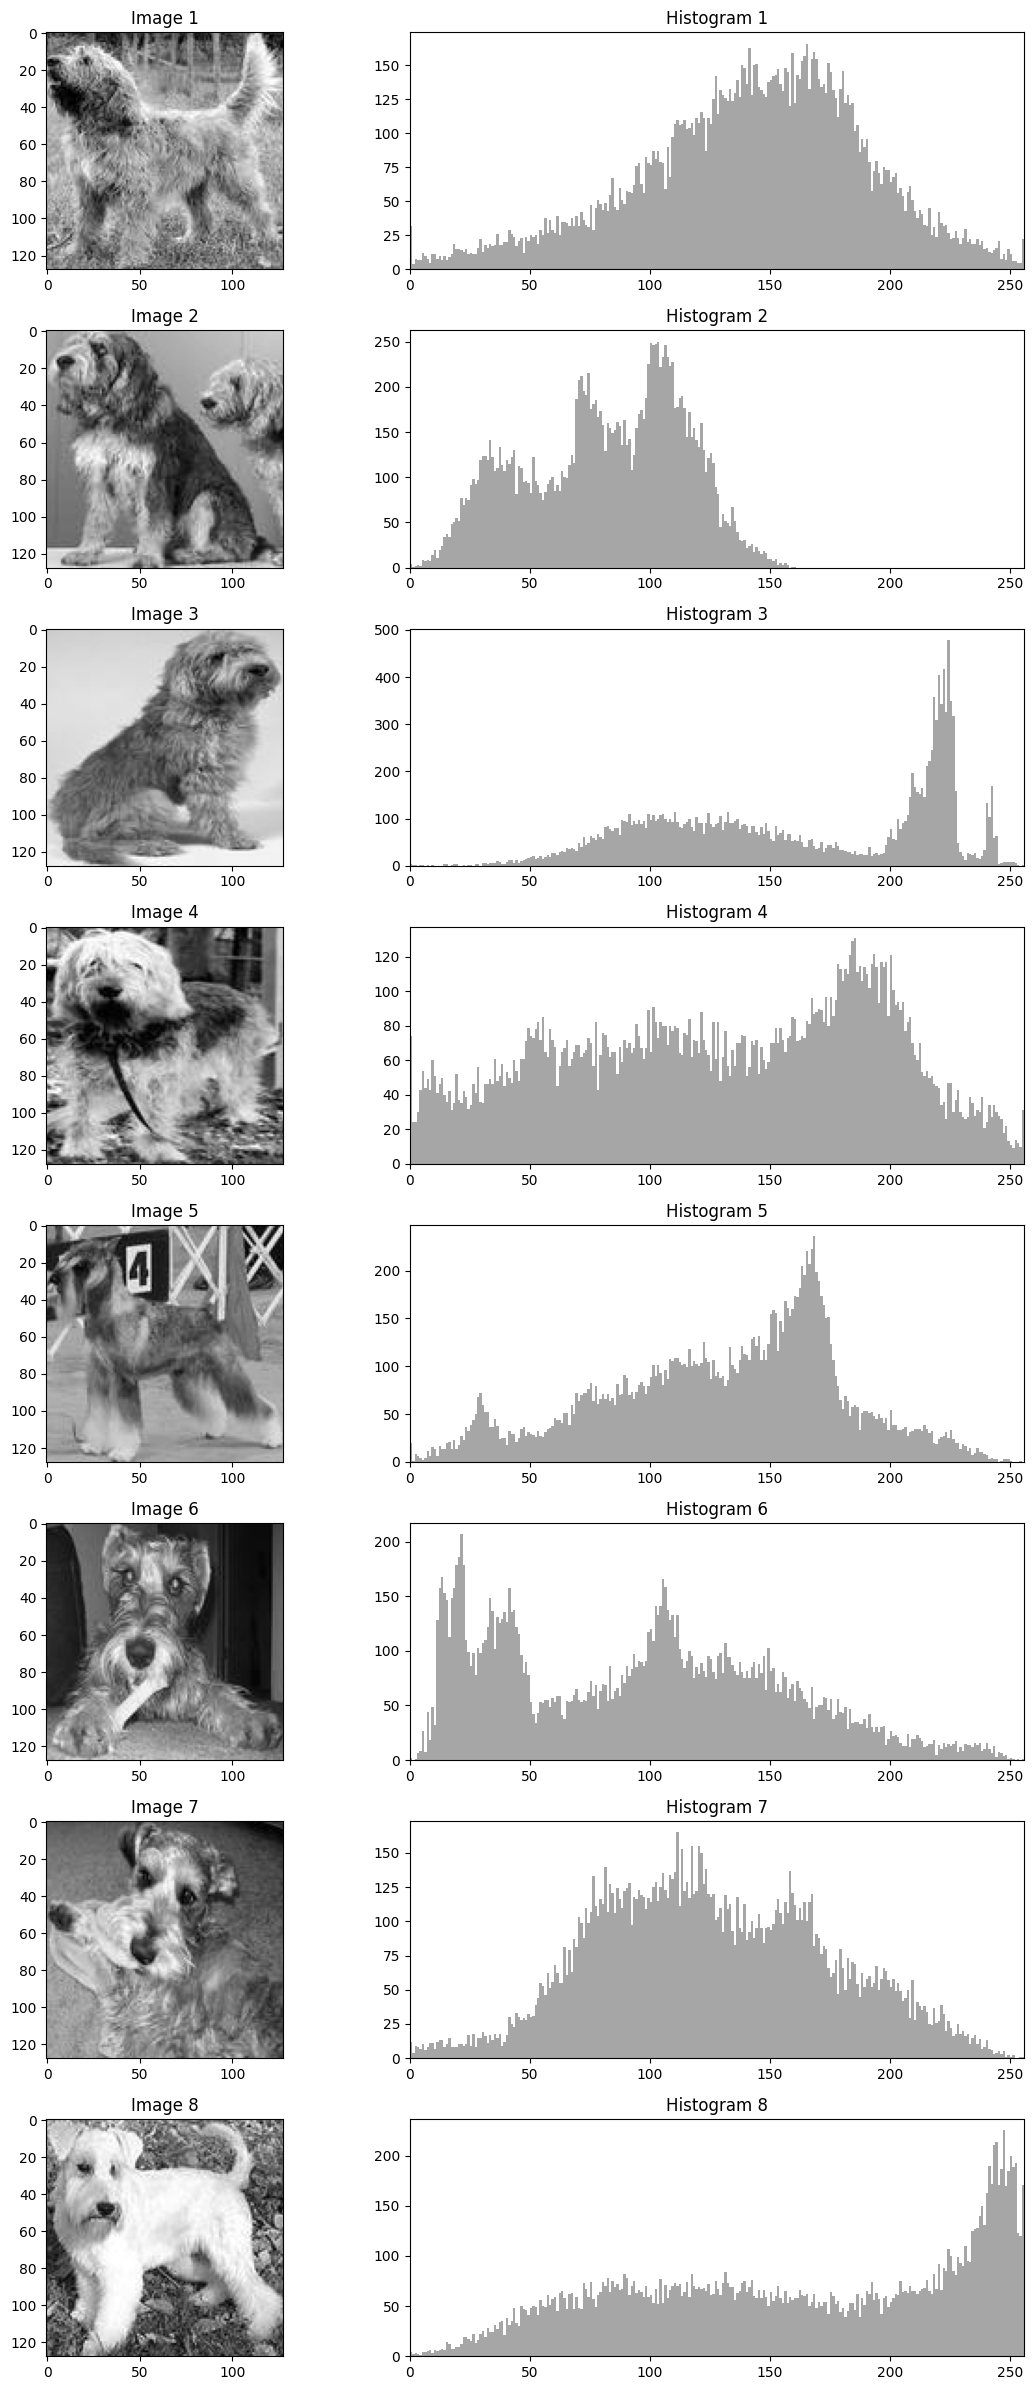

In [79]:
import cv2
import matplotlib.pyplot as plt
import os
folder_path = 'C:/Users/mohan/Desktop/grayscale_images'
image_files = [f for f in os.listdir(folder_path)]
num_images = min(len(image_files), 8)
fig, axs = plt.subplots(num_images, 2, figsize=(12, 3 * num_images))
for i in range(num_images):
    image = cv2.imread(os.path.join(folder_path, image_files[i]), cv2.IMREAD_GRAYSCALE)
    axs[i, 0].imshow(image, cmap='gray')
    axs[i, 0].set_title(f'Image {i + 1}')
    axs[i, 1].hist(image.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    axs[i, 1].set_xlim(0, 256)
    axs[i, 1].set_title(f'Histogram {i + 1}')
for j in range(num_images, 8):
    fig.delaxes(axs[j, 0])
    fig.delaxes(axs[j, 1])
plt.tight_layout()
plt.show()


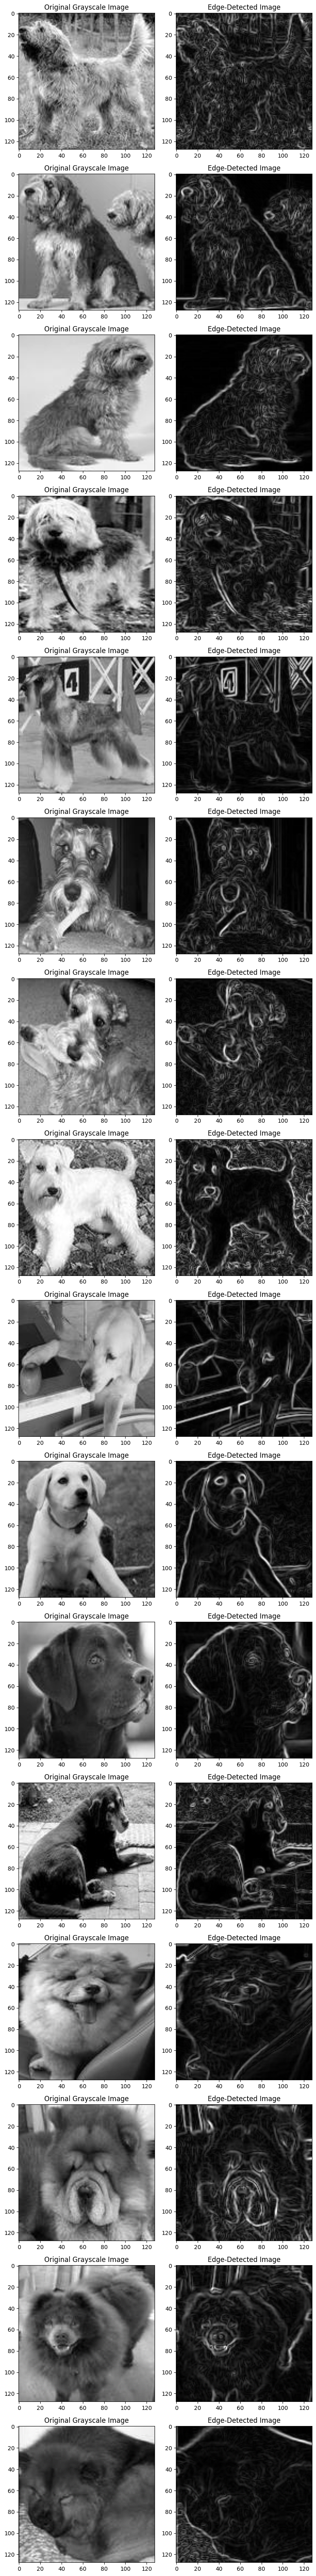

In [80]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from skimage import filters
def sobel_edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = filters.sobel(img)
    return edges
def plot_images_and_edges(image_paths):
    num_images = len(image_paths)
    fig, axes = plt.subplots(num_images, 2, figsize=(8, num_images * 4))
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        edges = sobel_edge_detection(image_path)
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title('Original Grayscale Image')
        axes[i, 1].imshow(edges, cmap='gray')
        axes[i, 1].set_title('Edge-Detected Image')
    plt.tight_layout()
    plt.show()
grayscale_folder = 'C:/Users/mohan/Desktop/grayscale_images'
grayscale_images = [os.path.join(grayscale_folder, file) for file in os.listdir(grayscale_folder)]
plot_images_and_edges(grayscale_images)

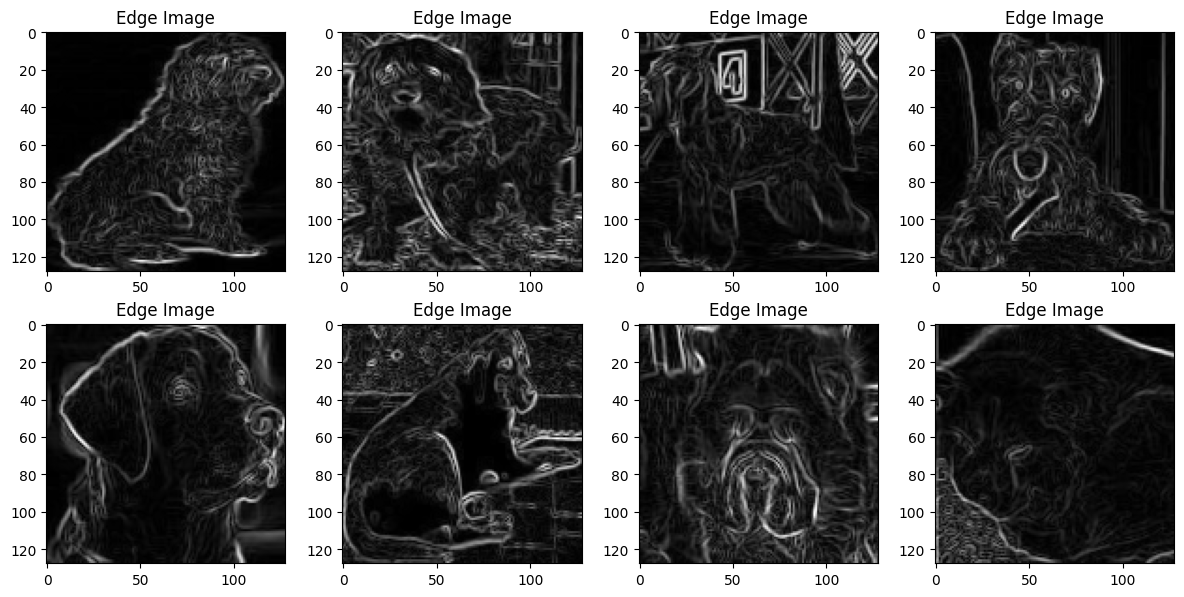

In [18]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage import data, filters
from skimage.io import imread
from skimage.color import rgb2gray
def sobel_edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = filters.sobel(img)
    return edges
def plot_edge_images(image_paths):
    num_images = len(image_paths)
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    for i, image_path in enumerate(image_paths):
        edges = sobel_edge_detection(image_path)
        axes[i // 4, i % 4].imshow(edges, cmap='gray')
        axes[i // 4, i % 4].set_title('Edge Image')
    for i in range(num_images, 8):
        axes[i // 4, i % 4].axis('off')
    plt.tight_layout()
    plt.show()
grayscale_folder = 'C:/Users/mohan/Desktop/grayscale_images'
grayscale_images = [os.path.join(grayscale_folder, file) for file in os.listdir(grayscale_folder)]
plot_edge_images(grayscale_images)


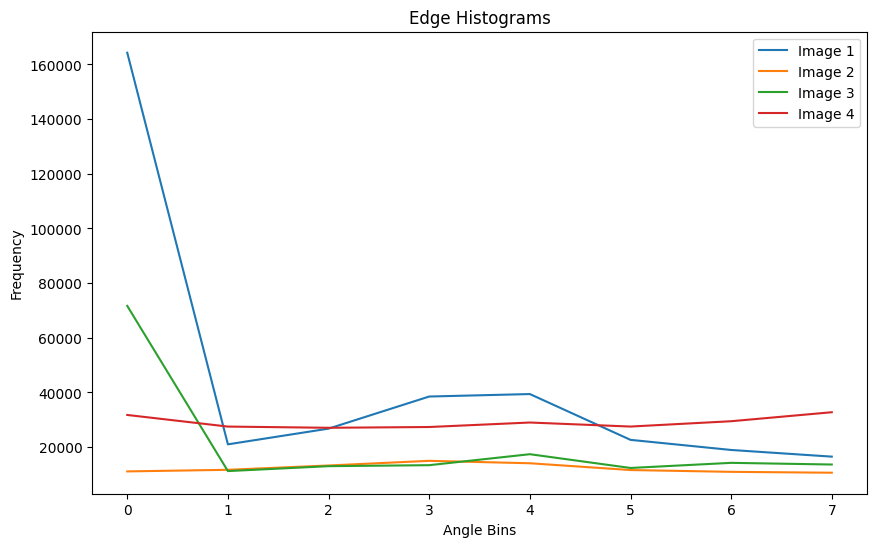

In [73]:
import cv2
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

# Function to compute edge histograms
def compute_edge_histogram(image):
    sobel_h = filters.sobel_h(image)
    sobel_v = filters.sobel_v(image)
    angles = angle(sobel_h, sobel_v)
    hist, bin_edges = np.histogram(angles, bins=8, range=(0, np.pi))
    return hist

# Load one image from each class and convert them to grayscale
image_paths = [
    'C:/Users/mohan/Desktop/Images/n02091635-otterhound/n02091635_2.jpg',
    'C:/Users/mohan/Desktop/Images/n02097209-standard_schnauzer/n02097209_1.jpg',
    'C:/Users/mohan/Desktop/Images/n02099712-Labrador_retriever/n02099712_57.jpg',
    'C:/Users/mohan/Desktop/Images/n02112137-chow/n02112137_112.jpg'
    # Add paths to other images here
]

grayscale_images = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in image_paths]

# Compute edge histograms for each grayscale image
edge_histograms = [compute_edge_histogram(image) for image in grayscale_images]

# Plot edge histograms
plt.figure(figsize=(10, 6))
for i, hist in enumerate(edge_histograms):
    plt.plot(hist, label=f'Image {i+1}')
plt.xlabel('Angle Bins')
plt.ylabel('Frequency')
plt.title('Edge Histograms')
plt.legend()
plt.show()


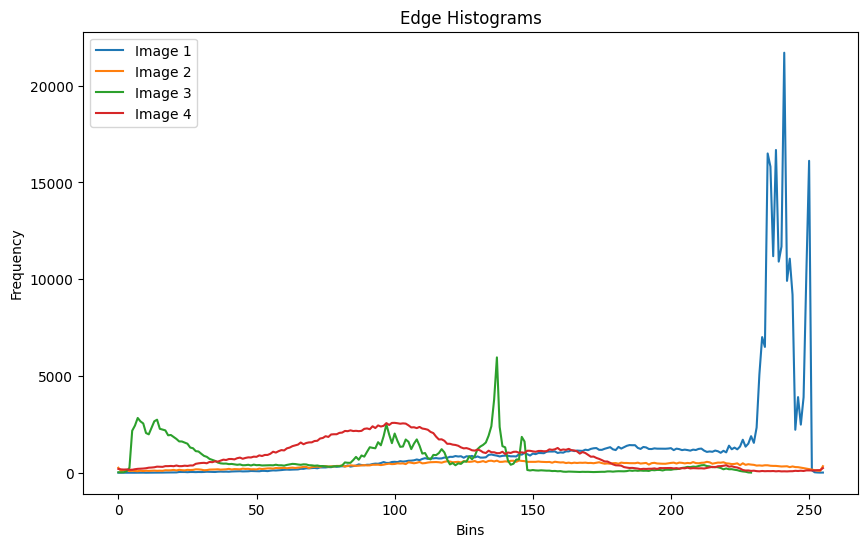

In [74]:
import cv2
import numpy as np
from skimage import filters, exposure
import matplotlib.pyplot as plt

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

def compute_edge_histogram(image):
    sobel_h = filters.sobel_h(image)
    sobel_v = filters.sobel_v(image)
    angles = angle(sobel_h, sobel_v)
    hist, bin_centers = exposure.histogram(image.ravel(), nbins=36, source_range='image')
    return hist

# Load one image from each class and convert them to grayscale
# Load one image from each class and convert them to grayscale
image_paths = [
    'C:/Users/mohan/Desktop/Images/n02091635-otterhound/n02091635_2.jpg',
    'C:/Users/mohan/Desktop/Images/n02097209-standard_schnauzer/n02097209_1.jpg',
    'C:/Users/mohan/Desktop/Images/n02099712-Labrador_retriever/n02099712_57.jpg',
    'C:/Users/mohan/Desktop/Images/n02112137-chow/n02112137_112.jpg'
    # Add paths to other images here
]

grayscale_images = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in image_paths]

# Compute edge histograms for each grayscale image
edge_histograms = [compute_edge_histogram(image) for image in grayscale_images]

# Plot edge histograms
plt.figure(figsize=(10, 6))
for i, hist in enumerate(edge_histograms):
    plt.plot(hist, label=f'Image {i+1}')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Edge Histograms')
plt.legend()
plt.show()


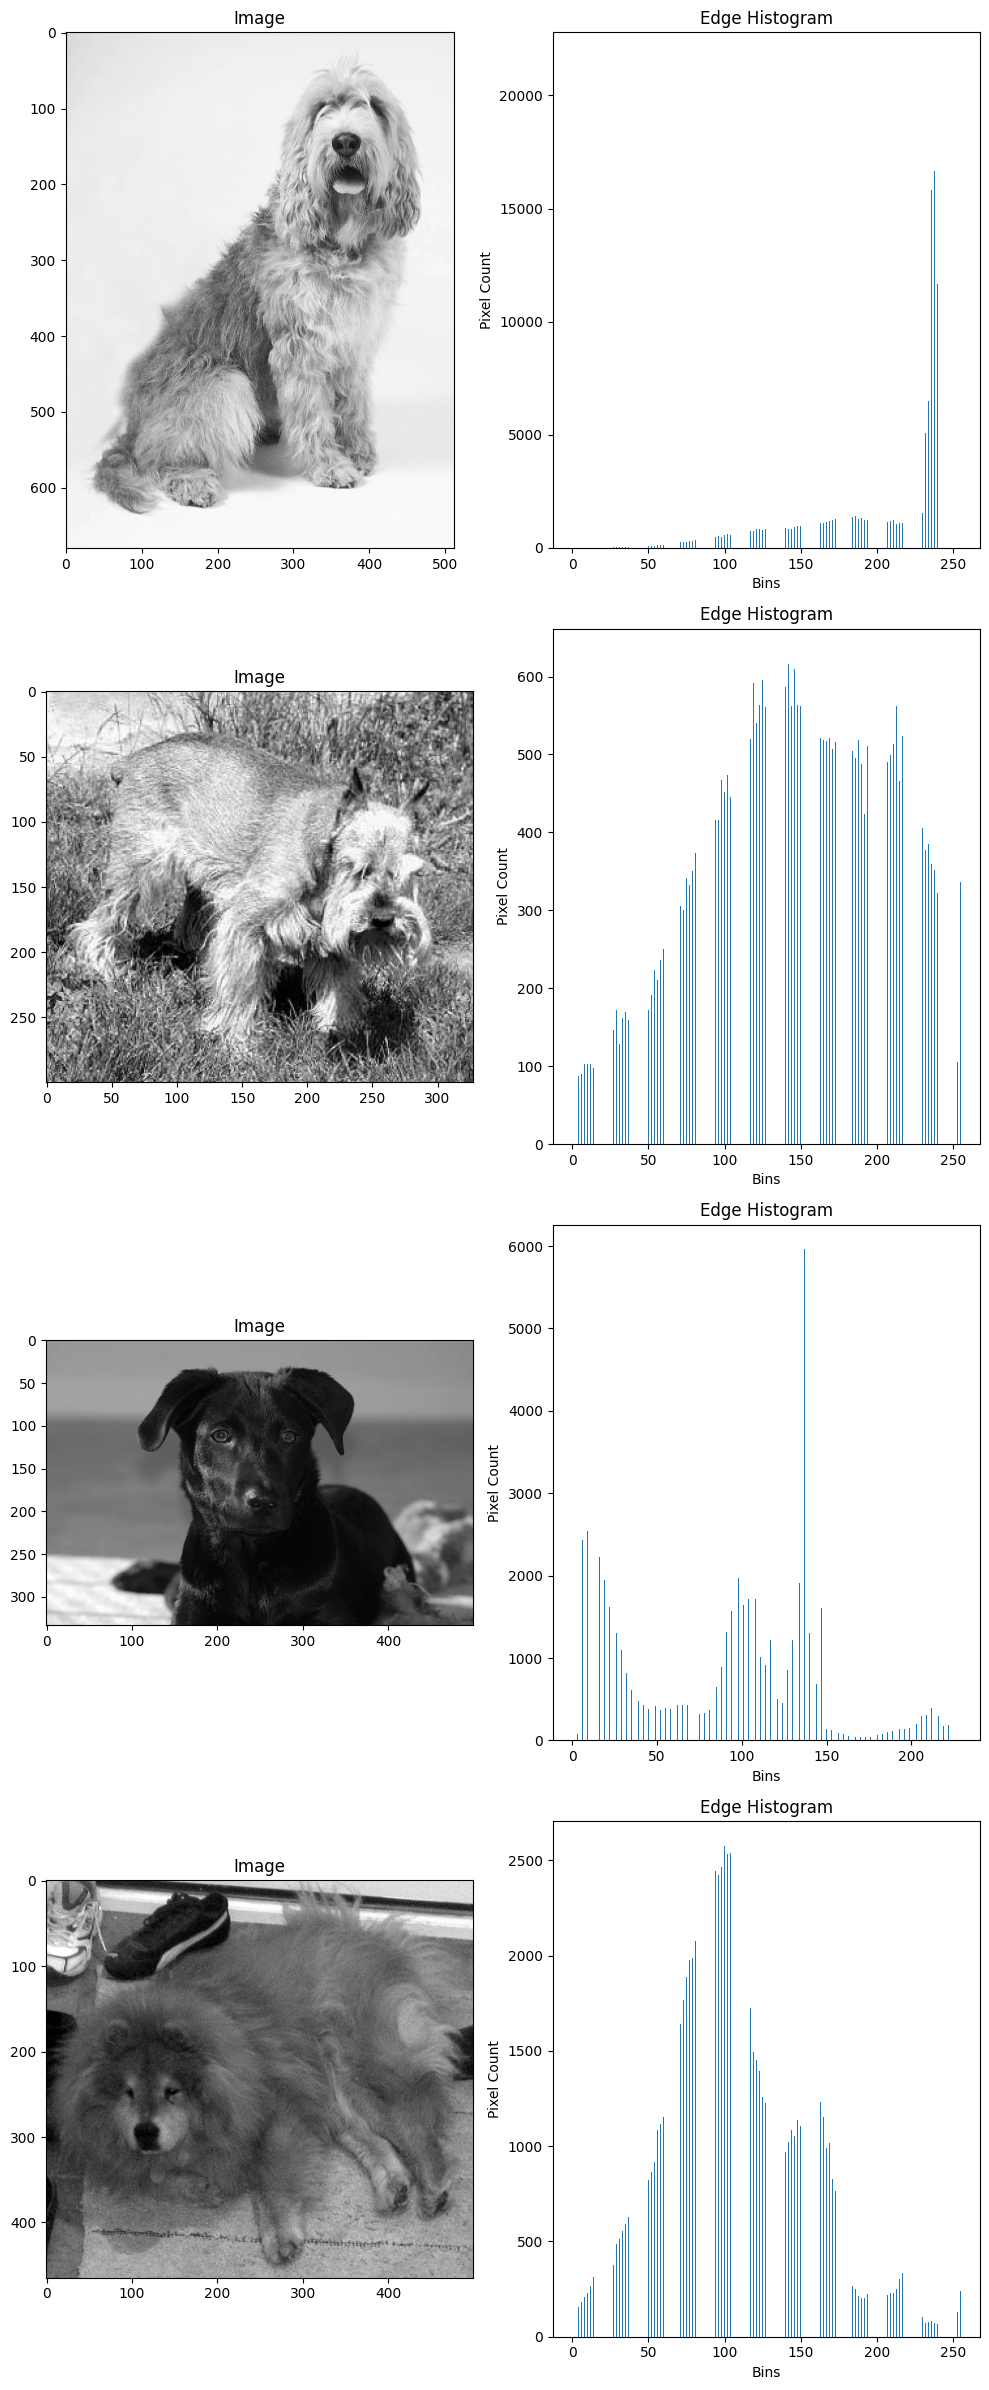

In [75]:
import cv2
import numpy as np
from skimage import filters, exposure
import matplotlib.pyplot as plt

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

def compute_edge_histogram(image):
    sobel_h = filters.sobel_h(image)
    sobel_v = filters.sobel_v(image)
    angles = angle(sobel_h, sobel_v)
    hist, bin_centers = exposure.histogram(image.ravel(), nbins=36, source_range='image')
    return hist, bin_centers

# Load one image from each class and convert them to grayscale
image_paths = [
    'C:/Users/mohan/Desktop/Images/n02091635-otterhound/n02091635_2.jpg',
    'C:/Users/mohan/Desktop/Images/n02097209-standard_schnauzer/n02097209_1.jpg',
    'C:/Users/mohan/Desktop/Images/n02099712-Labrador_retriever/n02099712_57.jpg',
    'C:/Users/mohan/Desktop/Images/n02112137-chow/n02112137_112.jpg'
    # Add paths to other images here
]
grayscale_images = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in image_paths]

# Compute edge histograms for each grayscale image
edge_histograms = [compute_edge_histogram(image) for image in grayscale_images]

# Plot images with their corresponding edge histograms
fig, axes = plt.subplots(len(grayscale_images), 2, figsize=(10, 6 * len(grayscale_images)))

for i, (image, (hist, bin_centers)) in enumerate(zip(grayscale_images, edge_histograms)):
    # Plot image
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title('Image')
    
    # Plot edge histogram
    axes[i, 1].bar(bin_centers, hist, width=np.pi / 18)
    axes[i, 1].set_xlabel('Bins')
    axes[i, 1].set_ylabel('Pixel Count')
    axes[i, 1].set_title('Edge Histogram')

plt.tight_layout()
plt.show()


In [76]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
image1_path = "C:\\Users\\mohan\\Desktop\\Images\\n02091635-otterhound\\n02091635_2.jpg"
image2_path = "C:\\Users\\mohan\\Desktop\\Images\\n02091635-otterhound\\n02091635_239.jpg"
hist1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
hist2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
desired_shape = (500, 323)  # Adjust to the desired shape
hist1 = cv2.resize(hist1, desired_shape)
hist2 = cv2.resize(hist2, desired_shape)
hist1_flat = hist1.flatten().reshape(1, -1)
hist2_flat = hist2.flatten().reshape(1, -1)
euclidean_distance = np.linalg.norm(hist1_flat - hist2_flat)
manhattan_distance = np.sum(np.abs(hist1_flat - hist2_flat))
cosine_similarity_score = cosine_similarity(hist1_flat, hist2_flat)[0][0]
cosine_distance = 1 - cosine_similarity_score
print(f"Euclidean Distance for same class : {euclidean_distance}")
print(f"Manhattan Distance for same class: {manhattan_distance}")
print(f"Cosine Distance for same class: {cosine_distance}")

Euclidean Distance for same class : 53226.740187616226
Manhattan Distance for same class: 18383173
Cosine Distance for same class: 0.10000894350854761


In [59]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
image1_path = "C:\\Users\\mohan\\Desktop\\Images\\n02091635-otterhound\\n02091635_2.jpg"
image2_path = "C:\\Users\\mohan\\Desktop\\Images\\n02112137-chow\\n02112137_112.jpg"
hist1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
hist2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
desired_shape = (500, 323)  # Adjust to the desired shape
hist1 = cv2.resize(hist1, desired_shape)
hist2 = cv2.resize(hist2, desired_shape)
hist1_flat = hist1.flatten().reshape(1, -1)
hist2_flat = hist2.flatten().reshape(1, -1)
euclidean_distance = np.linalg.norm(hist1_flat - hist2_flat)
manhattan_distance = np.sum(np.abs(hist1_flat - hist2_flat))
cosine_similarity_score = cosine_similarity(hist1_flat, hist2_flat)[0][0]
cosine_distance = 1 - cosine_similarity_score
print(f"Euclidean Distance for different class: {euclidean_distance}")
print(f"Manhattan Distance for different class: {manhattan_distance}")
print(f"Cosine Distance for different class: {cosine_distance}")

Euclidean Distance for different class: 52564.334448369074
Manhattan Distance for different class: 18612298
Cosine Distance for different class: 0.0956989295391073


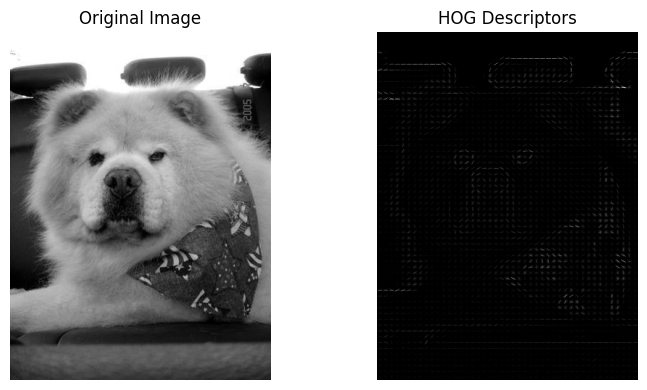

In [31]:
#2e
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

def compute_and_visualize_hog(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    hog_features, hog_image = hog(image, visualize=True)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Descriptors')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

image_path = "C:\\Users\\mohan\\Desktop\\Images\\n02112137-chow\\n02112137_347.jpg"
compute_and_visualize_hog(image_path)


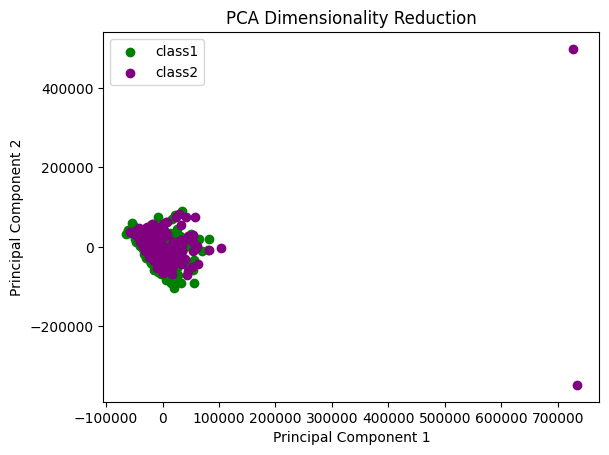

In [38]:
# 2F
import cv2
import os
import numpy as np
from skimage import filters, exposure
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def convert_to_edge_histograms(image_paths):
    edge_histograms = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        angles = filters.sobel_v(img), filters.sobel_h(img)
        hist_v, _ = exposure.histogram(angles[0], nbins=36)
        hist_h, _ = exposure.histogram(angles[1], nbins=36)
        edge_histograms.append(np.concatenate((hist_v, hist_h)))
    return edge_histograms

class_folders = {
    'class1': 'C:\\Users\\mohan\\Desktop\\Images\\n02099712-Labrador_retriever',
    'class2': 'C:\\Users\\mohan\\Desktop\\Images\\n02097209-standard_schnauzer'
}

selected_images = []
for class_name, folder in class_folders.items():
    image_files = os.listdir(folder)
    class_images = [os.path.join(folder, img) for img in image_files]
    selected_images.extend(class_images)

edge_histograms = convert_to_edge_histograms(selected_images)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(edge_histograms)

num_class1_images = len(os.listdir(class_folders['class1']))
plt.scatter(pca_result[:num_class1_images, 0], pca_result[:num_class1_images, 1], c='green', label='class1')
plt.scatter(pca_result[num_class1_images:, 0], pca_result[num_class1_images:, 1], c='purple', label='class2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Dimensionality Reduction')
plt.legend()
plt.show()
